# Week 6 : PIMA Indians Diabetes Database


---

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [ ]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/feliciastevany/DataMiningW2/refs/heads/main/diabetes.csv') # Read the dataset
df.sample(10) # Showing 10 random sample rows of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
705,6,80,80,36,0,39.8,0.177,28,0
767,1,93,70,31,0,30.4,0.315,23,0
241,4,91,70,32,88,33.1,0.446,22,0
704,4,110,76,20,100,28.4,0.118,27,0
687,1,107,50,19,0,28.3,0.181,29,0
146,9,57,80,37,0,32.8,0.096,41,0
464,10,115,98,0,0,24.0,1.022,34,0
196,1,105,58,0,0,24.3,0.187,21,0
752,3,108,62,24,0,26.0,0.223,25,0
152,9,156,86,28,155,34.3,1.189,42,1


## Exploratory Data Analysis

2. Display the info column

In [ ]:
#2
df.info() # Showing the info of all the column including datatype

# As shown, all the column from the dataset are number, which is integer and float
# There is 9 column in total and all column have 768 rows with no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3. Show describe of each column

In [ ]:
#3
description = df.describe()
description # showing the description of each column

# The table displays statistical summaries of all attributes.
# As we can see, there is 9 column in total with different range.
# As shown, all the columns have the same count of data that is 768.
# From the data, the feature with the highest range is glucose, with a range from 31.97 to 199.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


4. Number of unique value in Outcome

In [ ]:
#4
# Showing the number of unique value on Pregnancies and Outcome column to know the total number of diabetes people
outcome_counts = df['Pregnancies'].value_counts(dropna=False)
print(outcome_counts)

outcome_counts = df['Outcome'].value_counts(dropna=False)
print(outcome_counts)

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
Outcome
0    500
1    268
Name: count, dtype: int64


5. Null handling

In [ ]:
#5
missing = df.isnull().sum() # check if there is a null values
missing # showing the number of missing value

# Result
# There is no any colum with missing or null values. It means all the column have the same total of data.

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


6. Create own insightful visualization and explain it in at least 2 sentences

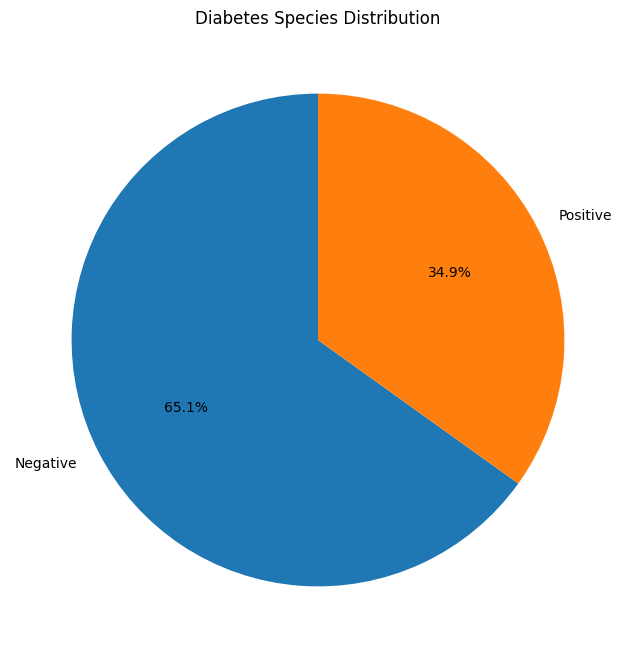

In [ ]:
#6
# Mapping integers to strings
label_map = {1: "Positive", 0: "Negative"}
mapped_outcome = df['Outcome'].map(label_map)

# Count the number of each species
Result_count = mapped_outcome.value_counts()

# Pie chart to show the distribution of Diabetes people
plt.figure(figsize=(8, 8))
plt.pie(Result_count, labels = Result_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Diabetes Species Distribution')
plt.show()

# Result
# The result is there is 34.9% people that tested positive diabetes and there is 65.1% people tested negative diabetes.

7. Check unique value of the target variable (Outcome)

In [ ]:
#7
unique_values = df['Outcome'].unique() # Checking unique values in Outcome column
print(unique_values) # Showing unique values in Outcome column

[1 0]


10. create a heatmap to see the correlation and explain the conclusion

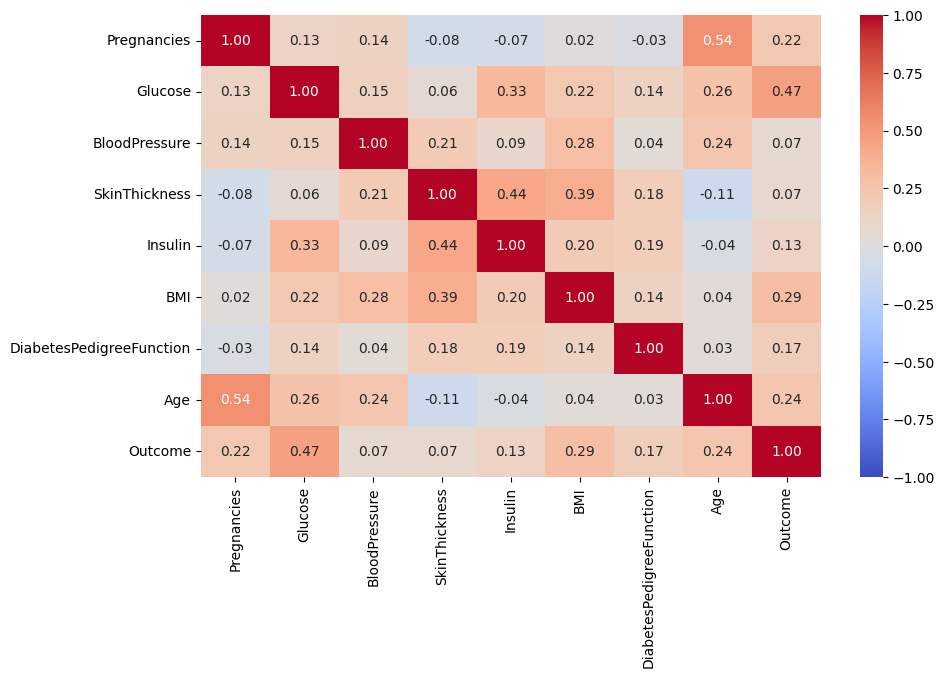

In [ ]:
#10
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('')

plt.show() #Showing the heatmap result

# Conclusion
# The intensity of the colors represents the correlation coefficient, where red indicates a strong positive correlation and blue indicates a negative correlation.
# The features Glucose, BMI, and Age appear to have the strongest associations with diabetes in this dataset, with Glucose being the most significant predictor.
# Many other variables don’t show strong correlations with the Outcome, suggesting they may not directly predict diabetes.

## Machine Learning

1. Splitting X and y

In [ ]:
# X is the predicting variable, and y is the predicted variable (target)
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [ ]:
# Splitting the data to traning and test using train test, with test size 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Checking how many rows and columns in each train and test data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)


## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [ ]:
#Criterion Entropy
#a
# Modelling using criterion entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=0)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
#b
# Predict X-test with creation entropy model
y_pred_entropy = clf_entropy.predict(X_test)

In [ ]:
#c
# Accuracy score using y_test and y_pred
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_entropy)) # Showing accuracy score using y_test and y_pred

Model accuracy score with criterion entropy: 0.7662


In [ ]:
#d
y_train_entropy = clf_entropy.predict(X_train)

# Accuracy for test and train using creation entropy model
test_accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
training_accuracy_entropy = accuracy_score(y_train, y_train_entropy)

# Showing testing and training accuracy based on train and test data
print('Testing accuracy: {0:0.4f}'.format(test_accuracy_entropy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy_entropy))

Testing accuracy: 0.7662
Training accuracy: 0.7752


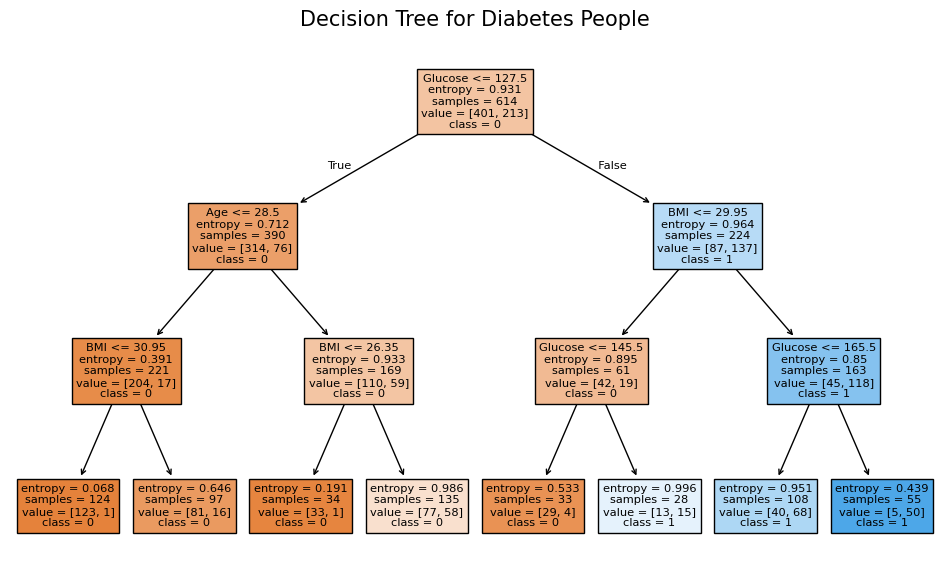

In [ ]:
#e
from sklearn import tree

# Plot the tree using the criterion entropy model
plt.figure(figsize=(12,7))
tree.plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Decision Tree for Diabetes People", fontsize=15)
plt.show()

2. Criterion Gini index

In [ ]:
#a
# Modelling using criterion gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
#b
# Predict X-test with criterion gini model
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
#c
# Accuracy score using y_test and y_pred
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_gini)) # Showing accuracy score using y_test and y_pred

Model accuracy score with criterion gini: 0.7597


In [ ]:
#d
y_train_gini = clf_gini.predict(X_train)

# Accuracy for test and train using criterion gini model
test_accuracy_gini = accuracy_score(y_test, y_pred_gini)
training_accuracy_gini = accuracy_score(y_train, y_train_gini)

# Showing testing and training accuracy based on train and test data
print('Testing accuracy: {0:0.4f}'.format(test_accuracy_gini))
print('Training accuracy: {0:0.4f}'.format(training_accuracy_gini))

Testing accuracy: 0.7597
Training accuracy: 0.7769


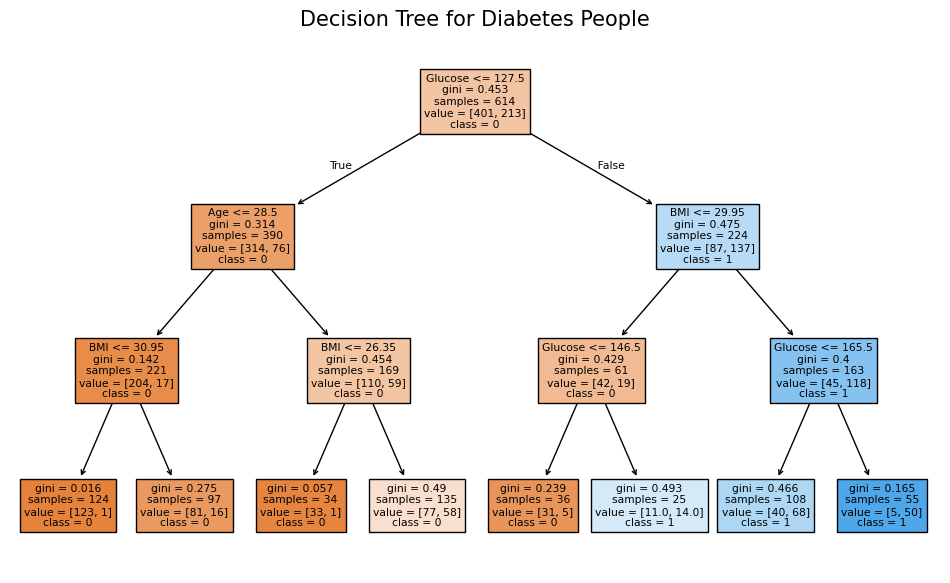

In [ ]:
#e
# Plot the tree for the criterion gini model
plt.figure(figsize=(12,7))
tree.plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Decision Tree for Diabetes People", fontsize=15)
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [ ]:
#f
# Confusion matrix of criterion entropy and criterion gini model
cm_entropy = confusion_matrix(y_test, y_pred_entropy)
cm_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix (Entropy):\n", cm_entropy)
print("Confusion Matrix (Gini):\n", cm_gini)

Confusion Matrix (Entropy):
 [[83 16]
 [20 35]]
Confusion Matrix (Gini):
 [[83 16]
 [21 34]]


In [ ]:
#g
# Classification report of criterion entropy and criterion gini model
clf_report_entropy = classification_report(y_test, y_pred_entropy)
clf_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", clf_report_entropy)
print("Classification Report Gini Index: \n", clf_report_gini)

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
#h
# Result
# Based on the classification report for both Criterion Entropy and Gini models, class 0 is predicted with higher precision, recall, and F1-score compared to class 1 in both models.
# For Class 1, the Entropy model slightly outperforms the Gini Index in terms of F1-score (0.66 vs. 0.65).
# The difference in the results between the two models using Entropy and Gini Index stems from how these two criteria measure the quality of a split during the decision tree building process.
# Even though differences are visible in terms of precision, recall, and F1-scores (especially for class 1), the overall accuracy of both models remains very close (0.77 vs. 0.76).
# This suggests that although the splitting behavior is slightly different, the overall ability to classify the data is comparable.

# Conclusion
# Since the training accuracy (0.7769) is higher than the testing accuracy (0.7597), the model might be slightly overfitting.
# However, the difference isn't big, so the model is still fairly stable.
# For this, Entropy performs better because it is more sensitive to the distribution of classes.
# It creates splits that better account for both the majority and minority classes, especially improving the performance for the smaller class.
# This sensitivity leads to better performance for class 1 (the minority class), improving its recall and F1-score.

## Naive Bayes


---

1. Defining the model

In [ ]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train) # Modelling using Naive Bayes

GaussianNB()

2. Predict the test set results

In [ ]:
# Predicting the test set results using Naive Bayes
y_pred = nb_model.predict(X_test)

3. Check accuracy score

In [ ]:
# Showing accuracy score using y_test and y_pred
accuracy_nb = accuracy_score(y_test, y_pred)
print(f"Model accuracy score: {accuracy_nb:.4f}")

Model accuracy score: 0.7662


4. Confusion matrix

In [ ]:
# Showing confusion matrix of Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm_nb)

Confusion Matrix:
 [[79 20]
 [16 39]]


5. Classification report

In [ ]:
# Showing the classification report based on y test and y pred
clf_report_nb = classification_report(y_test, y_pred)

print("Classification Report:\n", clf_report_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



6. Result and Conclusion

In [ ]:
# Result
# The Naive Bayes model achieved an accuracy score of 0.7762, showing that it correctly classified about 77.62% of the data.
# Class 0 has higher precision, recall, and F1-score than class 1, meaning the model is better at correctly identifying class 0.
# Class 1 has lower precision and F1-score, indicating the model struggles more with correctly predicting this minority class compared to class 0.

# Conclusion
# The Naive Bayes model performs well overall, with an accuracy of 77%, meaning it correctly classifies a good portion of the data.
# Class 0 is predicted more accurately, with higher precision (0.83), recall (0.80), and F1-score (0.81). This suggests the model is better at identifying the majority class (99 samples).
# Class 1, which has fewer samples (55), has lower precision (0.66) and F1-score (0.68). This indicates the model struggles more with identifying the minority class, potentially leading to more false positives and false negatives for this class.

## K-Nearest Neighbors


---

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Standardize the features with scaled data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train the classifier (choose K=5 as an example)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Make predictions on the test data

In [ ]:
y_pred = knn.predict(X_test)

Accuracy Score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 69.48%


Confusion Matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Result and Conclusion
# True Positives (79): The model correctly predicted 79 instances of class 0.
# False Positives (20): The model incorrectly predicted 20 instances as class 0 when they were actually class 1.
# False Negatives (27): The model incorrectly predicted 27 instances as class 1 when they were actually class 0.
# True Negatives (28): The model correctly predicted 28 instances of class 1.

Confusion Matrix:
[[79 20]
 [27 28]]


Classification Report

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Result and Conclusion
# Class 0 performs better than class 1, with higher precision (0.75), recall (0.80), and F1-score (0.77).
# Class 1 has lower precision (0.58), recall (0.51), and F1-score (0.54), indicating that the model struggles more with correctly identifying class 1.
# Overall accuracy is 69.48%, suggesting moderate performance, but there is room for improvement, particularly in handling class 1 predictions.

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154

